Here are all the graphs

In [15]:
import pickle5 as pickle
import numpy as np
import matplotlib.pyplot as plt
import json
%matplotlib inline

noise_rates = [0.0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.5]
seeds = [42, 35, 936, 235, 464, 912, 445, 202, 19, 986]

In [16]:
with open("metrics/metrics_ova_expert4.json", "rb") as f:
    metrics_ova_expert4 = json.load(f)

with open("metrics/metrics_softmax_expert4.json", "rb") as f:
    metrics_softmax_expert4 = json.load(f)

with open("metrics/metrics_ova_expert5.json", "rb") as f:
    metrics_ova_expert5 = json.load(f)

with open("metrics/metrics_softmax_expert5.json", "rb") as f:
    metrics_softmax_expert5 = json.load(f)

In [17]:
def get_mean_std_analytics(metrics):
    avg_std_error_rates = dict()
    important_metrics = ["coverage", "system_accuracy", "expert_accuracy", "classifier_accuracy", "alone_classifier", "validation_loss", "expert_0"]

    for i, noise in enumerate(noise_rates):
        error_rate_dict = {'coverage': dict(), 'system_accuracy': dict(), 'expert_accuracy': dict(), 'classifier_accuracy': dict(), 'alone_classifier': dict(), 'validation_loss': dict(), 'n_experts': dict(), 'expert_0': dict()}
        for key in important_metrics:
            values = [metrics[i][j][key] for j in range(len(metrics[0]))]
            error_rate_dict[key]["values"] = values
            error_rate_dict[key]["Mean"] = sum(values)/len(values)
            error_rate_dict[key]["std"] = np.std(values)
        avg_std_error_rates[noise] = error_rate_dict

    return avg_std_error_rates

In [18]:
avg_std_error_rates_softmax_expert4 = get_mean_std_analytics(metrics_softmax_expert4)
avg_std_error_rates_ova_expert4 = get_mean_std_analytics(metrics_ova_expert4)
avg_std_error_rates_list_expert4 = [avg_std_error_rates_softmax_expert4, avg_std_error_rates_ova_expert4]

avg_std_error_rates_softmax_expert5 = get_mean_std_analytics(metrics_softmax_expert5)
avg_std_error_rates_ova_expert5 = get_mean_std_analytics(metrics_ova_expert5)
avg_std_error_rates_list_expert5 = [avg_std_error_rates_softmax_expert5, avg_std_error_rates_ova_expert5]

losses = ["softmax", "ova"]

In [19]:
colors = ['blue', 'orange']
def plot_metrics(metric, ylim, lists, expert):
    for i, loss in enumerate(lists):
        plt.title(f"{metric} vs Noise rate with {losses[i]} ({expert})")
        plt.violinplot([loss[error_rate][metric]["values"] for error_rate in loss])
        plt.plot([1, 2, 3, 4, 5, 6, 7], [loss[error_rate][metric]["Mean"] for error_rate in loss], c=colors[i], label=losses[i])
        plt.ylim(ylim)
        plt.ylabel(metric + " percentage")
        plt.xlabel("Noise rate")
        plt.xticks([1, 2, 3, 4, 5, 6, 7], noise_rates)
        plt.grid()
        plt.legend()
        #plt.show()
    plt.savefig(f"images/{metric}_{expert}.png")

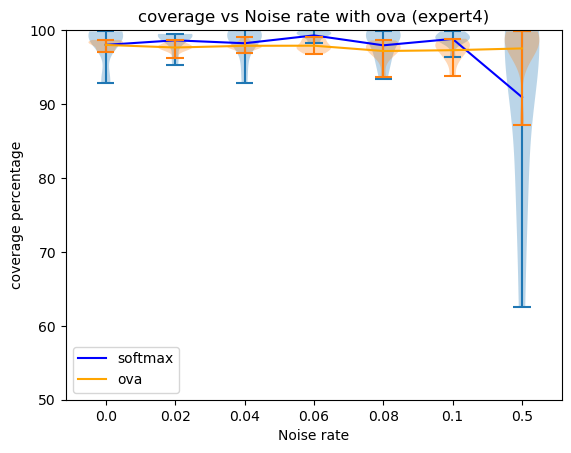

In [20]:
plot_metrics("coverage", (50, 100), avg_std_error_rates_list_expert4, "expert4")

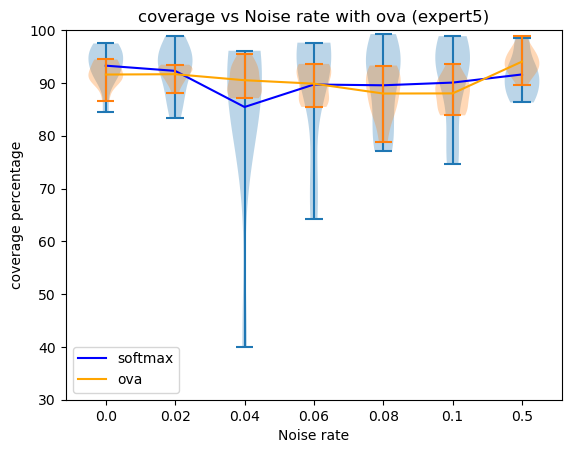

In [21]:
plot_metrics("coverage", (30, 100), avg_std_error_rates_list_expert5, "expert5")

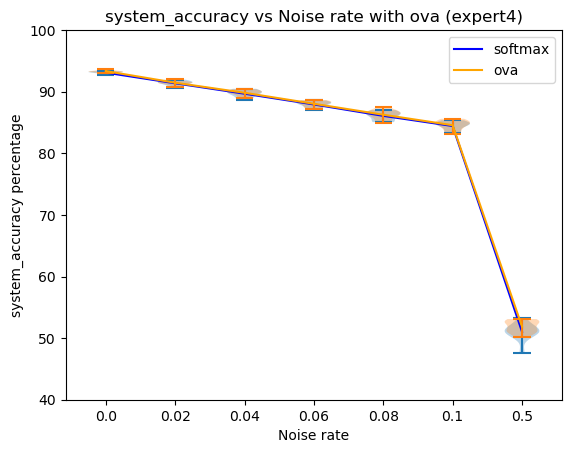

In [22]:
plot_metrics("system_accuracy", (40, 100), avg_std_error_rates_list_expert4, "expert4")

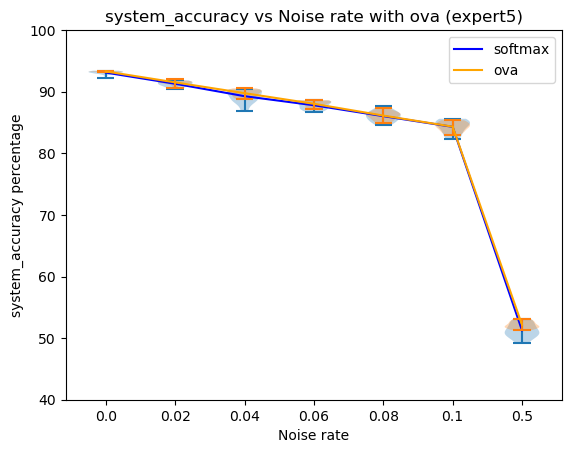

In [23]:
plot_metrics("system_accuracy", (40, 100), avg_std_error_rates_list_expert5, "expert5")

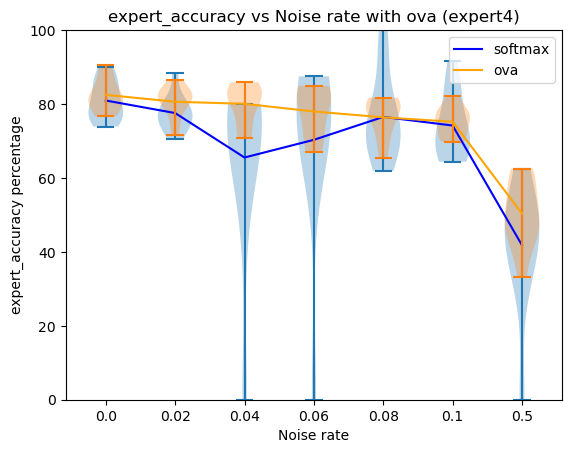

In [24]:
plot_metrics("expert_accuracy", (0, 100), avg_std_error_rates_list_expert4, "expert4")

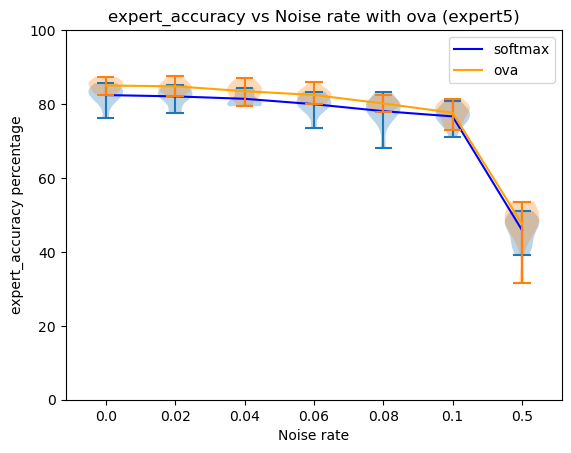

In [25]:
plot_metrics("expert_accuracy", (0, 100), avg_std_error_rates_list_expert5, "expert5")

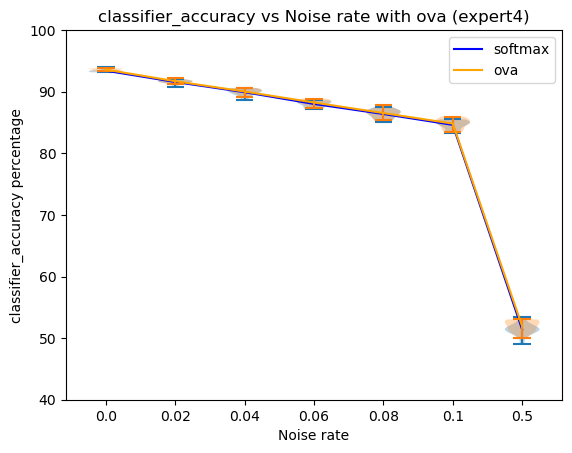

In [26]:
plot_metrics("classifier_accuracy", (40, 100), avg_std_error_rates_list_expert4, "expert4")

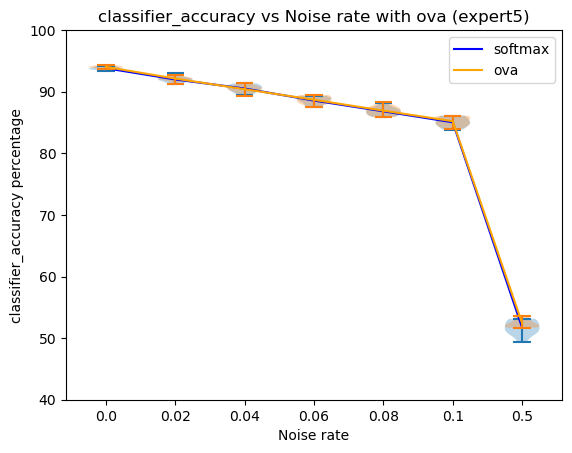

In [27]:
plot_metrics("classifier_accuracy", (40, 100), avg_std_error_rates_list_expert5, "expert5")